In [1]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

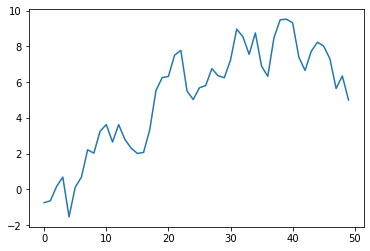

In [4]:
plt.plot(np.random.randn(50).cumsum())

In [5]:
import os
myList = []
with os.scandir('avalonlogs/logs') as entries:
    for entry in entries:
        myList.append(pd.json_normalize(json.load(open(entry))))

df = pd.concat(myList)


In [6]:
df

,missions,players,timeFinished._seconds,timeFinished._nanoseconds,options.inGameLog,outcome.state,outcome.votes,outcome.message,outcome.assassinated,outcome.roles,timeCreated._seconds,timeCreated._nanoseconds
0,"[{'teamSize': 3, 'proposals': [{'team': ['JOAN...","[{'name': 'JOANNE', 'uid': 'XFIN6Y6LvDQAOhph9o...",1600241534,82000000,False,GOOD_WIN,"[{'ANDREA': True, 'KEVIN': True, 'JOANNE': Tru...",Three successful missions,KUMI,"[{'name': 'TRASHLEY', 'role': 'LOYAL FOLLOWER'...",1600237267,918000000
0,"[{'proposals': [{'team': ['MUSA', 'DPB'], 'vot...","[{'name': 'MUSA', 'uid': 'mShfSw4mwEf0tbbOf0Bm...",1599789079,923000000,False,GOOD_WIN,"[{'DPB': True, 'MUSA': True}, {'MEW': False, '...",Three successful missions,MUSA,"[{'name': 'EMILY', 'assassin': False, 'role': ...",1599788547,54000000
0,"[{'failsRequired': 1, 'numFails': 0, 'state': ...","[{'name': 'BOSSMAN', 'uid': 'q78WRgUspVfBbMzCv...",1628735927,691000000,False,EVIL_WIN,"[{'FATTDONN': True, 'SAHER': True, 'BOSSMAN': ...",Three failed missions,None,"[{'role': 'LOYAL FOLLOWER', 'assassin': False,...",1628734890,144000000
0,"[{'proposals': [{'state': 'APPROVED', 'votes':...","[{'name': 'MINKY', 'uid': 'MY50M3zkIHd1JD4Yx6f...",1588282585,529000000,False,GOOD_WIN,"[{'GEE': True, 'BIANCA': True, 'MINKY': True},...",Three successful missions,BIANCA,"[{'assassin': False, 'name': 'TAYLOR', 'role':...",1588281849,917000000
0,"[{'teamSize': 2, 'failsRequired': 1, 'state': ...","[{'name': 'REGIS', 'uid': 'gTS5ixzdhtVY6fw6XK6...",1616879097,29000000,False,GOOD_WIN,"[{'LAURA': True, 'AMANDINE': True}, {'LAURA': ...",Three missions succeeded,None,"[{'role': 'LOYAL FOLLOWER', 'name': 'BRUNO', '...",1616878358,942000000
...,...,...,...,...,...,...,...,...,...,...,...,...
0,"[{'team': ['AVI', 'INEEN'], 'proposals': [{'vo...","[{'name': 'AVI', 'uid': 'YLnDKOrzU6NugJSFU5E5m...",1592702909,31000000,False,GOOD_WIN,"[{'AVI': True, 'INEEN': True}, {'AA': True, 'M...",Three successful missions,AVI,"[{'name': 'INEEN', 'role': 'EVIL MINION', 'ass...",1592702215,765000000
0,"[{'teamSize': 3, 'failsRequired': 1, 'state': ...","[{'name': 'COOPER', 'uid': 'PS1ny6F7dmT3QqGw9D...",1606545001,864000000,False,EVIL_WIN,"[{'MACK': True, 'MITCH': True, 'GRADY': True},...",Merlin assassinated,MITCH,"[{'name': 'MACK', 'role': 'MORDRED', 'assassin...",1606543178,240000000
0,"[{'team': ['LIN', 'EDMUND'], 'failsRequired': ...","[{'name': 'TERRY', 'uid': 'tcFOWKJ60ZaEq3cfaNG...",1593903549,784000000,False,EVIL_WIN,"[{'EDMUND': True, 'LIN': True}, {'EDMUND': Tru...",Three failed missions,None,"[{'name': 'TERRY', 'assassin': False, 'role': ...",1593901689,499000000
0,"[{'numFails': 0, 'teamSize': 2, 'state': 'SUCC...","[{'name': 'ROCIO', 'uid': 'VbUDJdM4SNRVWhkElP1...",1592713089,660000000,False,EVIL_WIN,"[{'RYAN': True, 'LASER': True}, {'TOBY': True,...",Merlin assassinated,BRIAN,"[{'name': 'RYAN', 'role': 'LOYAL FOLLOWER', 'a...",1592712155,978000000


In [7]:
df['hasMerlin'] =   df.apply(lambda row: any([True for role in row['outcome.roles'] if role['role'] == "MERLIN"]), axis=1)
df['hasPercival'] = df.apply(lambda row: any([True for role in row['outcome.roles'] if role['role'] == "PERCIVAL"]), axis=1)
df['hasOberon'] = df.apply(lambda row: any([True for role in row['outcome.roles'] if role['role'] == "OBERON"]), axis=1)
df['hasMordred'] = df.apply(lambda row: any([True for role in row['outcome.roles'] if role['role'] == "MORDRED"]), axis=1)
df['hasMorgana'] = df.apply(lambda row: any([True for role in row['outcome.roles'] if role['role'] == "MORGANA"]), axis=1)
df['numPlayers'] = df.apply(lambda row: len(row['outcome.roles']), axis=1)

df['assassinationAttempted'] = df.apply(lambda row: row['outcome.assassinated'] is not None, axis=1)
df['evilWin'] = df.apply(lambda row: row['outcome.state'] == "EVIL_WIN", axis=1)
df['evilWinByAssassination'] = df.apply(lambda row: row['evilWin'] and row['outcome.message'] == "Merlin assassinated", axis=1)

#df[df["outcome.message"] == "Merlin assassinated"]
#df.groupby(['hasMerlin', 'hasPercival', 'hasOberon', 'hasMordred', 'evilWin']).agg(['count'])
summary = df.groupby(['hasMerlin','hasMorgana', 'hasPercival', 'evilWin']).agg(['count'])['missions']
summary['pct'] = summary.groupby(level=[0,1,2]).apply(lambda x: 100 * x / float(x.sum()))
summary

count         pct
hasMerlin hasMorgana hasPercival evilWin                   
False     False      False       False      520   50.930460
                                 True       501   49.069540
                     True        False        1  100.000000
          True       False       False        8   88.888889
                                 True         1   11.111111
                     True        False        7  100.000000
True      False      False       False      663   40.377588
                                 True       979   59.622412
                     True        False      179   45.088161
                                 True       218   54.911839
          True       False       False       54   37.500000
                                 True        90   62.500000
                     True        False     3960   43.970686
                                 True      5046   56.029314

In [8]:
def roleForName(roles, name):
    for role in roles:
        if (role['name'] == name):
            return role['role']
    return None

df['roleAssassinated'] = df.apply (lambda row: roleForName(row['outcome.roles'], row['outcome.assassinated']), axis=1)
df

,missions,players,timeFinished._seconds,timeFinished._nanoseconds,options.inGameLog,outcome.state,outcome.votes,outcome.message,outcome.assassinated,outcome.roles,...,hasMerlin,hasPercival,hasOberon,hasMordred,hasMorgana,numPlayers,assassinationAttempted,evilWin,evilWinByAssassination,roleAssassinated
0,"[{'teamSize': 3, 'proposals': [{'team': ['JOAN...","[{'name': 'JOANNE', 'uid': 'XFIN6Y6LvDQAOhph9o...",1600241534,82000000,False,GOOD_WIN,"[{'ANDREA': True, 'KEVIN': True, 'JOANNE': Tru...",Three successful missions,KUMI,"[{'name': 'TRASHLEY', 'role': 'LOYAL FOLLOWER'...",...,True,True,False,True,True,9,True,False,False,LOYAL FOLLOWER
0,"[{'proposals': [{'team': ['MUSA', 'DPB'], 'vot...","[{'name': 'MUSA', 'uid': 'mShfSw4mwEf0tbbOf0Bm...",1599789079,923000000,False,GOOD_WIN,"[{'DPB': True, 'MUSA': True}, {'MEW': False, '...",Three successful missions,MUSA,"[{'name': 'EMILY', 'assassin': False, 'role': ...",...,True,True,False,False,True,6,True,False,False,LOYAL FOLLOWER
0,"[{'failsRequired': 1, 'numFails': 0, 'state': ...","[{'name': 'BOSSMAN', 'uid': 'q78WRgUspVfBbMzCv...",1628735927,691000000,False,EVIL_WIN,"[{'FATTDONN': True, 'SAHER': True, 'BOSSMAN': ...",Three failed missions,None,"[{'role': 'LOYAL FOLLOWER', 'assassin': False,...",...,True,True,False,True,True,9,False,True,False,None
0,"[{'proposals': [{'state': 'APPROVED', 'votes':...","[{'name': 'MINKY', 'uid': 'MY50M3zkIHd1JD4Yx6f...",1588282585,529000000,False,GOOD_WIN,"[{'GEE': True, 'BIANCA': True, 'MINKY': True},...",Three successful missions,BIANCA,"[{'assassin': False, 'name': 'TAYLOR', 'role':...",...,True,False,False,False,False,10,True,False,False,LOYAL FOLLOWER
0,"[{'teamSize': 2, 'failsRequired': 1, 'state': ...","[{'name': 'REGIS', 'uid': 'gTS5ixzdhtVY6fw6XK6...",1616879097,29000000,False,GOOD_WIN,"[{'LAURA': True, 'AMANDINE': True}, {'LAURA': ...",Three missions succeeded,None,"[{'role': 'LOYAL FOLLOWER', 'name': 'BRUNO', '...",...,False,False,False,False,False,6,False,False,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,"[{'team': ['AVI', 'INEEN'], 'proposals': [{'vo...","[{'name': 'AVI', 'uid': 'YLnDKOrzU6NugJSFU5E5m...",1592702909,31000000,False,GOOD_WIN,"[{'AVI': True, 'INEEN': True}, {'AA': True, 'M...",Three successful missions,AVI,"[{'name': 'INEEN', 'role': 'EVIL MINION', 'ass...",...,True,False,False,True,False,7,True,False,False,LOYAL FOLLOWER
0,"[{'teamSize': 3, 'failsRequired': 1, 'state': ...","[{'name': 'COOPER', 'uid': 'PS1ny6F7dmT3QqGw9D...",1606545001,864000000,False,EVIL_WIN,"[{'MACK': True, 'MITCH': True, 'GRADY': True},...",Merlin assassinated,MITCH,"[{'name': 'MACK', 'role': 'MORDRED', 'assassin...",...,True,False,False,True,False,8,True,True,True,MERLIN
0,"[{'team': ['LIN', 'EDMUND'], 'failsRequired': ...","[{'name': 'TERRY', 'uid': 'tcFOWKJ60ZaEq3cfaNG...",1593903549,784000000,False,EVIL_WIN,"[{'EDMUND': True, 'LIN': True}, {'EDMUND': Tru...",Three failed missions,None,"[{'name': 'TERRY', 'assassin': False, 'role': ...",...,True,True,False,False,True,5,False,True,False,None
0,"[{'numFails': 0, 'teamSize': 2, 'state': 'SUCC...","[{'name': 'ROCIO', 'uid': 'VbUDJdM4SNRVWhkElP1...",1592713089,660000000,False,EVIL_WIN,"[{'RYAN': True, 'LASER': True}, {'TOBY': True,...",Merlin assassinated,BRIAN,"[{'name': 'RYAN', 'role': 'LOYAL FOLLOWER', 'a...",...,True,True,False,False,True,6,True,True,True,MERLIN


In [9]:
assassinStats = (df.groupby(['numPlayers', 'hasPercival', 'roleAssassinated']).agg(['count']))['missions']
assassinStats['pct'] = assassinStats.groupby(level=[0, 1]).apply(lambda x: 100 * x / float(x.sum()))
assassinStats

count        pct
numPlayers hasPercival roleAssassinated                  
5          False       EVIL MINION           4   0.852878
                       LOYAL FOLLOWER      273  58.208955
                       MERLIN              191  40.724947
                       MORDRED               1   0.213220
           True        EVIL MINION           1   0.061728
                       LOYAL FOLLOWER      428  26.419753
                       MERLIN              648  40.000000
                       MORGANA              12   0.740741
                       OBERON                2   0.123457
                       PERCIVAL            529  32.654321
6          False       LOYAL FOLLOWER      233  63.143631
                       MERLIN              134  36.314363
                       MORGANA               1   0.271003
                       OBERON                1   0.271003
           True        EVIL MINION           1   0.061125
                       LOYAL FOLLOWER      608  37.163814
                       MERLIN              577  35.268949
                       MORGANA              11   0.672372
                       OBERON                1   0.061125
                       PERCIVAL            438  26.772616
7          False       EVIL MINION           3   1.648352
                       LOYAL FOLLOWER      115  63.186813
                       MERLIN               63  34.615385
                       OBERON                1   0.549451
           True        LOYAL FOLLOWER      627  40.166560
                       MERLIN              566  36.258808
                       MORDRED               2   0.128123
                       MORGANA              10   0.640615
                       OBERON               13   0.832799
                       PERCIVAL            343  21.973094
8          False       EVIL MINION           1   1.315789
                       LOYAL FOLLOWER       41  53.947368
                       MERLIN               34  44.736842
           True        EVIL MINION           3   0.323625
                       LOYAL FOLLOWER      406  43.797195
                       MERLIN              322  34.735707
                       MORGANA               2   0.215750
                       OBERON                5   0.539374
                       PERCIVAL            189  20.388350
9          False       EVIL MINION           1   2.083333
                       LOYAL FOLLOWER       30  62.500000
                       MERLIN               16  33.333333
                       MORDRED               1   2.083333
           True        LOYAL FOLLOWER      251  54.684096
                       MERLIN              131  28.540305
                       MORDRED               1   0.217865
                       MORGANA               1   0.217865
                       OBERON                1   0.217865
                       PERCIVAL             74  16.122004
10         False       LOYAL FOLLOWER       11  78.571429
                       MERLIN                3  21.428571
           True        LOYAL FOLLOWER      137  46.283784
                       MERLIN              116  39.189189
                       OBERON                2   0.675676
                       PERCIVAL             41  13.851351

In [10]:
df[df["outcome.message"] == "Merlin assassinated"]

,missions,players,timeFinished._seconds,timeFinished._nanoseconds,options.inGameLog,outcome.state,outcome.votes,outcome.message,outcome.assassinated,outcome.roles,...,hasMerlin,hasPercival,hasOberon,hasMordred,hasMorgana,numPlayers,assassinationAttempted,evilWin,evilWinByAssassination,roleAssassinated
0,"[{'proposals': [{'team': ['KLAUDIA', 'GORDON']...","[{'name': 'KLAUDIA', 'uid': 'zbmVWflTTrfBLHCGF...",1602290769,744000000,False,EVIL_WIN,"[{'NIKHIL': True, 'ANINDYA': True}, {'NIKHIL':...",Merlin assassinated,ALYSSA,"[{'role': 'MERLIN', 'name': 'ALYSSA', 'assassi...",...,True,True,False,False,True,6,True,True,True,MERLIN
0,"[{'team': ['JONAS', 'INGO'], 'failsRequired': ...","[{'uid': 'rLlw5o67cwZVDwpeTLxyGWKXS1H3', 'name...",1589062592,377000000,False,EVIL_WIN,"[{'JONAS': True, 'INGO': True}, {'CHRISTOPH': ...",Merlin assassinated,KARL,"[{'role': 'PERCIVAL', 'assassin': False, 'name...",...,True,True,False,False,True,6,True,True,True,MERLIN
0,"[{'proposals': [{'votes': ['LATEDATIDA', 'MEEM...","[{'name': 'IAN', 'uid': 'dwJbahcH4ATiKHP21PiGy...",1616816592,844000000,False,EVIL_WIN,"[{'LARA': True, 'BETHANY': True}, {'MEEMS': Tr...",Merlin assassinated,LARA,"[{'assassin': False, 'role': 'LOYAL FOLLOWER',...",...,True,True,False,False,True,6,True,True,True,MERLIN
0,"[{'numFails': 1, 'failsRequired': 1, 'proposal...","[{'name': 'RACHEL', 'uid': 'TWBhTLIEb9XLJZiaBj...",1594181789,201000000,False,EVIL_WIN,"[{'SARAH': False, 'MICHAEL': True, 'FRUITNAY':...",Merlin assassinated,SOPHIE,"[{'role': 'PERCIVAL', 'name': 'LILA', 'assassi...",...,True,True,False,False,True,8,True,True,True,MERLIN
0,"[{'failsRequired': 1, 'proposals': [{'proposer...","[{'name': 'CALEB', 'uid': 'fjQZGtOmRHVfbUPJfem...",1593660098,936000000,False,EVIL_WIN,"[{'KAROLINE': True, 'CALEB': True, 'RACHEL': T...",Merlin assassinated,CALEB,"[{'assassin': False, 'role': 'MORDRED', 'name'...",...,True,True,False,True,True,8,True,True,True,MERLIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,"[{'proposals': [{'state': 'APPROVED', 'votes':...","[{'uid': 'dJk0zm45lpdRwzfgFhRzf21GThN2', 'name...",1591197852,191000000,False,EVIL_WIN,"[{'ROBOROBO': True, 'PRANAV': True}, {'HRICCHA...",Merlin assassinated,PRANAV,"[{'role': 'LOYAL FOLLOWER', 'assassin': False,...",...,True,False,False,False,False,6,True,True,True,MERLIN
0,"[{'teamSize': 2, 'state': 'SUCCESS', 'team': [...","[{'name': 'RAPHAEL', 'uid': 'w67mEdN2WkVUzkqVt...",1588550358,584000000,False,EVIL_WIN,"[{'RUSS': True, 'ALLEN': True}, {'ALLEN': True...",Merlin assassinated,MATTROMO,"[{'assassin': False, 'role': 'LOYAL FOLLOWER',...",...,True,True,False,False,True,7,True,True,True,MERLIN
0,"[{'proposals': [{'team': ['MOIRA', 'PRAVEEN', ...","[{'uid': 'fkS5ZYpOT3N3cgqn0bzao5y0aaY2', 'name...",1591674676,111000000,False,EVIL_WIN,"[{'YI': True, 'MOIRA': True, 'CHEVIN': True}, ...",Merlin assassinated,ABHI,"[{'assassin': False, 'name': 'ABHI', 'role': '...",...,True,True,False,True,True,8,True,True,True,MERLIN
0,"[{'teamSize': 3, 'failsRequired': 1, 'state': ...","[{'name': 'COOPER', 'uid': 'PS1ny6F7dmT3QqGw9D...",1606545001,864000000,False,EVIL_WIN,"[{'MACK': True, 'MITCH': True, 'GRADY': True},...",Merlin assassinated,MITCH,"[{'name': 'MACK', 'role': 'MORDRED', 'assassin...",...,True,False,False,True,False,8,True,True,True,MERLIN


In [11]:
assassinStats = (df.groupby(['hasMerlin', 'hasMorgana', 'hasPercival', 'evilWin'], dropna=False).agg(['count']))['missions']
assassinStats['pct'] = assassinStats.groupby(level=[0,1,2]).apply(lambda x: 100 * x / float(x.sum()))
assassinStats


count         pct
hasMerlin hasMorgana hasPercival evilWin                   
False     False      False       False      520   50.930460
                                 True       501   49.069540
                     True        False        1  100.000000
          True       False       False        8   88.888889
                                 True         1   11.111111
                     True        False        7  100.000000
True      False      False       False      663   40.377588
                                 True       979   59.622412
                     True        False      179   45.088161
                                 True       218   54.911839
          True       False       False       54   37.500000
                                 True        90   62.500000
                     True        False     3960   43.970686
                                 True      5046   56.029314

In [12]:
assassinStats = (df.groupby(['hasMerlin', 'assassinationAttempted'], dropna=False).agg(['count']))['missions']
assassinStats['pct'] = assassinStats.groupby(level=[0]).apply(lambda x: 100 * x / float(x.sum()))
assassinStats


count         pct
hasMerlin assassinationAttempted                   
False     False                    1038  100.000000
True      False                    3532   31.566717
          True                     7657   68.433283